In [1]:
#  📌Step 1: Read the dataset
import pandas as pd
import numpy  as np
data = pd.read_excel(r"C:/Users/Sina/Desktop/CODES/Sources/CLUSTERING/Online_Retail_2.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
295,536396,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 10:51:00,4.25,17850,United Kingdom
296,536397,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-12-01 10:51:00,4.65,17924,United Kingdom
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-01 10:51:00,4.65,17924,United Kingdom
298,536398,21980,PACK OF 12 RED RETROSPOT TISSUES,24,2010-12-01 10:52:00,0.29,13448,United Kingdom


In [2]:
# 📌 Step 2: Process numeric data and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_features = ['Quantity', 'UnitPrice']
num_data = data[num_features].fillna(0)

In [3]:
# Standardize numeric data
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_data)

In [4]:
# PCA(Reduce to 2 Dimensions)
pca = PCA(n_components=2, random_state=45)
pca_components = pca.fit_transform(num_scaled)

In [5]:
#Save PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,0.128988,-0.334673
1,0.188308,-0.275353
2,0.113585,-0.291023
3,0.188308,-0.275353
4,0.188308,-0.275353
...,...,...
295,0.249040,-0.214621
296,0.188709,-0.097794
297,-0.342764,0.433679
298,-0.296348,-0.228536


In [6]:
#📌 Step 3: Process categorical data and apply MCA
cat_features = ['Country', 'Description']
cat_data = data[cat_features].astype(str).fillna('Unknown')
#✅ Choose 2 categorical columns and fill NaNs.

In [7]:
#👉 Apply MCA (Multiple Correspondence Analysis):
import prince
mca = prince.MCA(n_components=2, random_state=45)
mca = mca.fit(cat_data)
mca_components = mca.transform(cat_data)

In [8]:
# 👉 Save MCA components:
mca_df = pd.DataFrame(mca_components.values, columns=['MCA1', 'MCA2'])
mca_df

,MCA1,MCA2
0,-0.364320,-0.066107
1,-0.366299,-0.066138
2,-0.364948,-0.067518
3,-0.362274,-0.068147
4,-0.367023,-0.066661
...,...,...
295,-0.367557,-0.069463
296,-0.362651,-0.063953
297,0.080301,0.715797
298,-0.363216,-0.065800


In [9]:
#📌 Step 4: Combine PCA + MCA
pca_df = pca_df.reset_index(drop=True)
mca_df = mca_df.reset_index(drop=True)
combined_df = pd.concat([pca_df, mca_df], axis=1)
combined_df

,PCA1,PCA2,MCA1,MCA2
0,0.128988,-0.334673,-0.364320,-0.066107
1,0.188308,-0.275353,-0.366299,-0.066138
2,0.113585,-0.291023,-0.364948,-0.067518
3,0.188308,-0.275353,-0.362274,-0.068147
4,0.188308,-0.275353,-0.367023,-0.066661
...,...,...,...,...
295,0.249040,-0.214621,-0.367557,-0.069463
296,0.188709,-0.097794,-0.362651,-0.063953
297,-0.342764,0.433679,0.080301,0.715797
298,-0.296348,-0.228536,-0.363216,-0.065800


In [10]:
# 📌 Step 5: KMeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df[['PCA1', 'PCA2', 'MCA1', 'MCA2']])

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(scaled_features)
combined_df['Cluster_scaled'] = kmeans.labels_
print(combined_df['Cluster_scaled'].value_counts())


Cluster_scaled
0    257
3     20
1     14
2      8
4      1
Name: count, dtype: int64


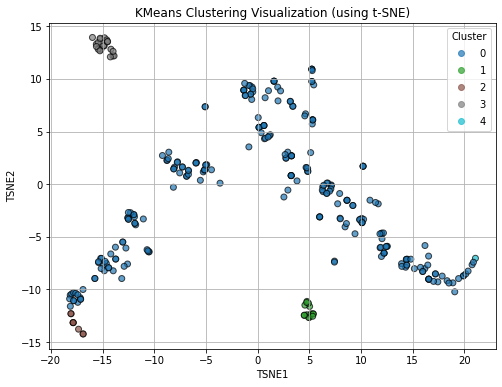

In [16]:
from sklearn.manifold import TSNE

# Apply t-SNE to 4D scaled features
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Add to dataframe
combined_df['TSNE1'] = tsne_results[:, 0]
combined_df['TSNE2'] = tsne_results[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    combined_df['TSNE1'],
    combined_df['TSNE2'],
    c=combined_df['Cluster_scaled'],
    cmap='tab10',
    alpha=0.7,
    edgecolors='k'
)
plt.title('KMeans Clustering Visualization (using t-SNE)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [11]:
combined_df

,PCA1,PCA2,MCA1,MCA2,Cluster_scaled
0,0.128988,-0.334673,-0.364320,-0.066107,0
1,0.188308,-0.275353,-0.366299,-0.066138,0
2,0.113585,-0.291023,-0.364948,-0.067518,0
3,0.188308,-0.275353,-0.362274,-0.068147,0
4,0.188308,-0.275353,-0.367023,-0.066661,0
...,...,...,...,...,...
295,0.249040,-0.214621,-0.367557,-0.069463,0
296,0.188709,-0.097794,-0.362651,-0.063953,0
297,-0.342764,0.433679,0.080301,0.715797,0
298,-0.296348,-0.228536,-0.363216,-0.065800,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df[['PCA1', 'PCA2', 'MCA1', 'MCA2']])


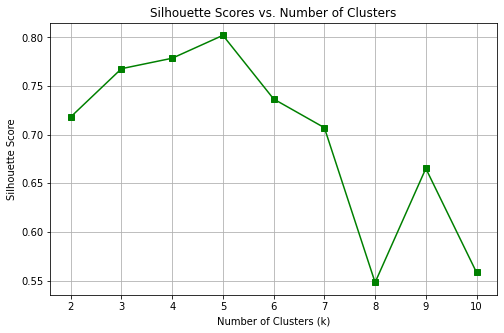

In [13]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [14]:
"""from sklearn.metrics import silhouette_score
import numpy as np

# your data
X = scaled_features
labels = combined_df['Cluster_scaled']

# compute the observed silhouette score
observed_score = silhouette_score(X, labels)
print(f"Observed Silhouette Score: {observed_score:.4f}")

# simple permutation test
null_scores = []
n_permutations = 20  # keep small for simplicity; increase for more precision

for _ in range(n_permutations):
    permuted_labels = np.random.permutation(labels)
    null_score = silhouette_score(X, permuted_labels)
    null_scores.append(null_score)

null_scores = np.array(null_scores)

# p-value: proportion of null scores >= observed
p_value = np.mean(null_scores >= observed_score)

print(f"Approximate p-value: {p_value:.4f}")"""


'from sklearn.metrics import silhouette_score\nimport numpy as np\n\n# your data\nX = scaled_features\nlabels = combined_df[\'Cluster_scaled\']\n\n# compute the observed silhouette score\nobserved_score = silhouette_score(X, labels)\nprint(f"Observed Silhouette Score: {observed_score:.4f}")\n\n# simple permutation test\nnull_scores = []\nn_permutations = 20  # keep small for simplicity; increase for more precision\n\nfor _ in range(n_permutations):\n    permuted_labels = np.random.permutation(labels)\n    null_score = silhouette_score(X, permuted_labels)\n    null_scores.append(null_score)\n\nnull_scores = np.array(null_scores)\n\n# p-value: proportion of null scores >= observed\np_value = np.mean(null_scores >= observed_score)\n\nprint(f"Approximate p-value: {p_value:.4f}")'

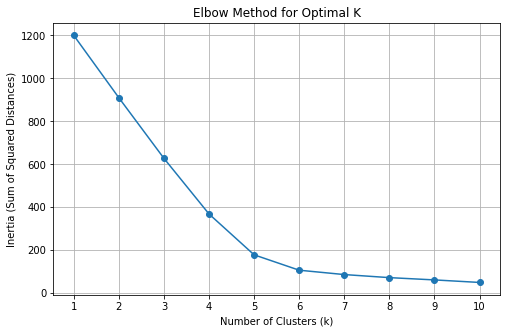

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(K_range)
plt.grid(True)
plt.show()
